In [1]:
# read dataset from csv
import pandas as pd

dataset = pd.read_csv('dataset_id-date-title-link.csv')

In [2]:
# for every record take year and add it to the record
dataset['year'] = dataset['date'].apply(lambda x: x.split('-')[0])

In [3]:
# for every record take month and add it to the record
dataset['month'] = dataset['date'].apply(lambda x: x.split('-')[1])

In [4]:
# for every record take day and add it to the record
dataset['day'] = dataset['date'].apply(lambda x: x.split('-')[2])

<AxesSubplot:xlabel='year'>

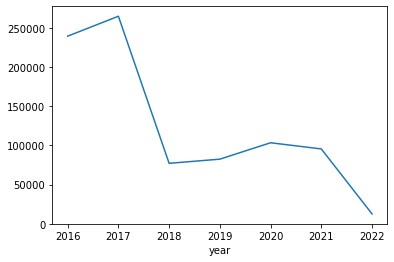

In [5]:
# plot by year
dataset.groupby('year').count()['id'].plot()

<AxesSubplot:xlabel='month'>

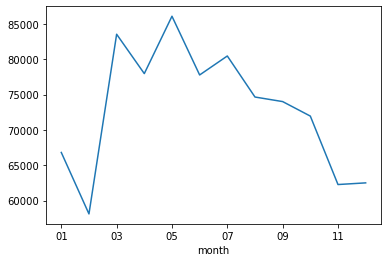

In [6]:
# plot by month
dataset.groupby('month').count()['id'].plot()

<AxesSubplot:xlabel='day'>

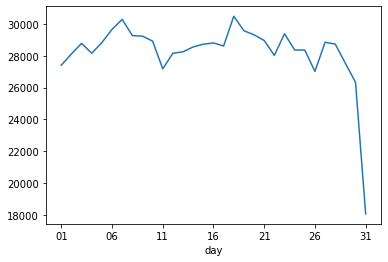

In [7]:
# plot by day
dataset.groupby('day').count()['id'].plot()

In [8]:
# convert to year and month with count
by_year_month = dataset.groupby(by=['year', 'month']).count()['id'].unstack()

<AxesSubplot:xlabel='month', ylabel='year'>

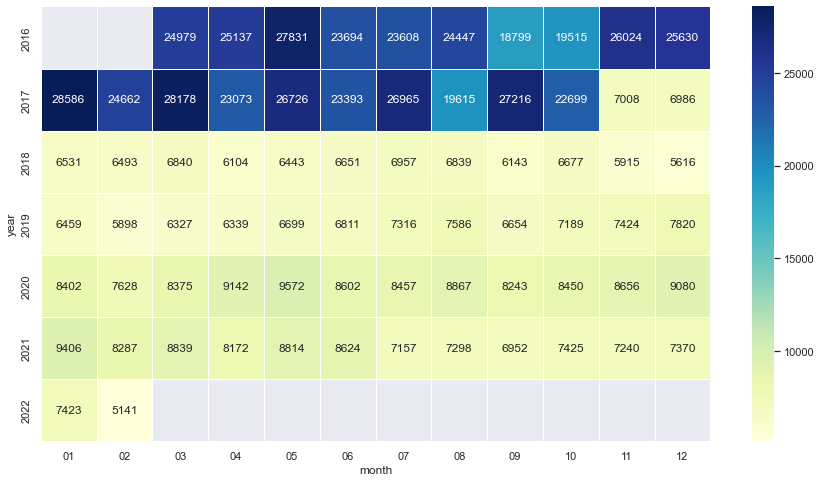

In [19]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=by_year_month, linewidths=.5, annot=True, fmt='.0f', cmap="YlGnBu")